In [1]:
#change the dataset into Pandas dataframe
import pandas as pd
dataset = pd.read_csv("Kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")
#anyway check the raw data
dataset.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#check the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [3]:
#As you know, there are 26 alphabets from A to Z. 
#The first colummn shows labels comprised of "0 to 25", in short, the correct answers.
#For example, "0" is "A". "25" is "Z".
#Process loading dataset and change it into float 32 data, and name the first colummn "label".
dataset.astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)
# Now X is "Explanatory variable", y is "Taget".
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [4]:
alphabets="abcdefghijklmnopqrstuvwxyz"
letter_name=[]
[letter_name.append(i) for i in alphabets]
name_tag = pd.DataFrame(letter_name)

D:\Program Files\anaconda3\envs\JP_OCR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label'>

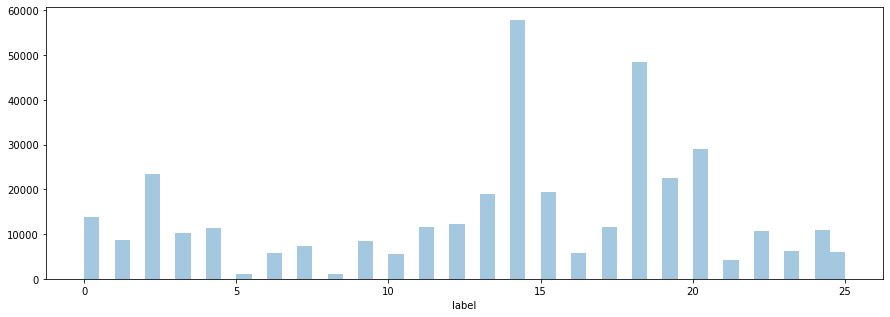

In [5]:
#import two libraries, matplot, seaborn.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.distplot(y,kde=False)

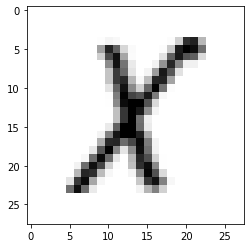

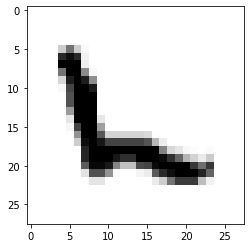

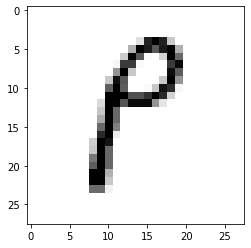

In [6]:
#import numpy and give a seed. 
import numpy as np
np.random.seed(2)
#Show 3 letter at random and convert them into gray scale letters. 
for i in range(3):
    plt.imshow(X.iloc[np.random.randint(0,372449)].values.reshape(28,28),cmap='Greys')
    plt.show()

In [7]:
# load some libraries that I frequently use. 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
#Now, reload the dataset and change it into "numpy array".
dataset = np.loadtxt('Kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv', delimiter=',')
#Divide dataset into two parts, one is "Explanatory variable", the other is "Taget".
X = dataset[:,0:784]
Y = dataset[:,0]
#Split the "X,Y" data into the ratio of 7:3, 3 is the test size. 
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.3, random_state=2)
#Reshape the data and change it into float 32 as usual.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
#The pixcel of the data is comprised from 0 to 255. 0 is white,255 is black.
#Now normalize the data from 0 to 1 without some libraries, in a simple way.
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# One-Hot-Encoding of the target.
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
# Define the classification of 26 alphabets.
num_classes = Y_test.shape[1]

In [10]:
#Build an ordinary "Deep Learning" model with CNN and maxpooling by using Keras.
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Choose an optimizer and compile the model.
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#And print the summary of the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#Fit the train data of model 1.
Train1=model.fit(X_train, Y_train,batch_size=128, epochs=5)

Epoch 1/5
2037/2037 [==============================] - 49s 24ms/step - loss: 0.2035 - accuracy: 0.9433
Epoch 2/5
2037/2037 [==============================] - 52s 25ms/step - loss: 0.1050 - accuracy: 0.9701
Epoch 3/5
2037/2037 [==============================] - 53s 26ms/step - loss: 0.0933 - accuracy: 0.9732
Epoch 4/5
2037/2037 [==============================] - 51s 25ms/step - loss: 0.0853 - accuracy: 0.9756
Epoch 5/5
2037/2037 [==============================] - 53s 26ms/step - loss: 0.0761 - accuracy: 0.9782


In [12]:
#Check the test data of the model 1.
Test1=model.fit(X_test, Y_test,batch_size=128, epochs=5)

Epoch 1/5
873/873 [==============================] - 21s 24ms/step - loss: 0.0869 - accuracy: 0.9763
Epoch 2/5
873/873 [==============================] - 21s 24ms/step - loss: 0.0637 - accuracy: 0.9815
Epoch 3/5
873/873 [==============================] - 22s 25ms/step - loss: 0.0569 - accuracy: 0.9837
Epoch 4/5
873/873 [==============================] - 21s 24ms/step - loss: 0.0479 - accuracy: 0.9860
Epoch 5/5
873/873 [==============================] - 20s 22ms/step - loss: 0.0491 - accuracy: 0.9860


In [13]:
#Build the second model to look for best or better models.
#Many people says "Adam" is way better than RMSprop. But I wanna try it just in case.
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
#Now the second model's optimizer is "RMSprop".
model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
#Check the second model named the model 2.
Train2=model.fit(X_train, Y_train,batch_size=128, epochs=5)

Epoch 1/5
2037/2037 [==============================] - 56s 27ms/step - loss: 0.1864 - accuracy: 0.9474
Epoch 2/5
2037/2037 [==============================] - 55s 27ms/step - loss: 0.0643 - accuracy: 0.9826
Epoch 3/5
2037/2037 [==============================] - 56s 27ms/step - loss: 0.0460 - accuracy: 0.9878
Epoch 4/5
2037/2037 [==============================] - 56s 27ms/step - loss: 0.0358 - accuracy: 0.9907
Epoch 5/5
2037/2037 [==============================] - 56s 27ms/step - loss: 0.0287 - accuracy: 0.9926


In [15]:
#Check the test data of the second model too.
Test2=model.fit(X_test, Y_test,batch_size=128, epochs=5)

Epoch 1/5
873/873 [==============================] - 24s 27ms/step - loss: 0.0444 - accuracy: 0.9885
Epoch 2/5
873/873 [==============================] - 24s 28ms/step - loss: 0.0294 - accuracy: 0.9922
Epoch 3/5
873/873 [==============================] - 24s 27ms/step - loss: 0.0213 - accuracy: 0.9944
Epoch 4/5
873/873 [==============================] - 24s 27ms/step - loss: 0.0163 - accuracy: 0.9957
Epoch 5/5
873/873 [==============================] - 24s 27ms/step - loss: 0.0123 - accuracy: 0.9968


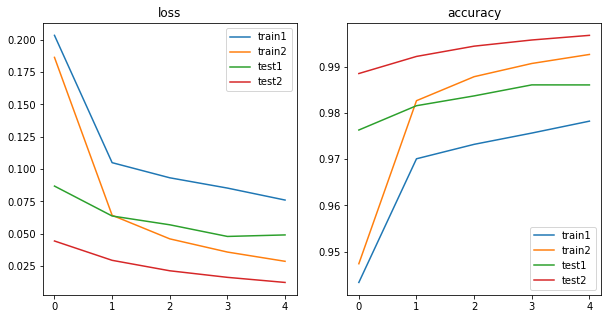

In [16]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric) 
    plt_train1 = Train1.history[metric] 
    plt_test1 = Test1.history[metric]
    plt_train2 = Train2.history[metric]
    plt_test2 = Test2.history[metric] 
    #plot them all
    plt.plot(plt_train1, label='train1') 
    plt.plot(plt_train2, label='train2') 
    plt.plot(plt_test1, label='test1') 
    plt.plot(plt_test2, label='test2') 
    plt.legend() 
plt.show()

In [17]:
#I wanna try Dilution technique also know as Dropout. So I build the third model.
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Print the model
print(model.summary())
#Compile the model
model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
________________________________________________

In [18]:
#Now check the both data of the third model in one time.
Train3=model.fit(X_train, Y_train,batch_size=128, epochs=5)
Test3=model.fit(X_test, Y_test,batch_size=128, epochs=5)

Epoch 1/5
2037/2037 [==============================] - 66s 32ms/step - loss: 0.1852 - accuracy: 0.9484
Epoch 2/5
2037/2037 [==============================] - 66s 32ms/step - loss: 0.0682 - accuracy: 0.9813
Epoch 3/5
2037/2037 [==============================] - 66s 32ms/step - loss: 0.0526 - accuracy: 0.9856
Epoch 4/5
2037/2037 [==============================] - 66s 32ms/step - loss: 0.0425 - accuracy: 0.9882
Epoch 5/5
2037/2037 [==============================] - 66s 33ms/step - loss: 0.0374 - accuracy: 0.9898
Epoch 1/5
873/873 [==============================] - 28s 32ms/step - loss: 0.0527 - accuracy: 0.9860
Epoch 2/5
873/873 [==============================] - 28s 32ms/step - loss: 0.0397 - accuracy: 0.9893
Epoch 3/5
873/873 [==============================] - 28s 32ms/step - loss: 0.0321 - accuracy: 0.9914
Epoch 4/5
873/873 [==============================] - 29s 33ms/step - loss: 0.0273 - accuracy: 0.9925
Epoch 5/5
873/873 [==============================] - 28s 32ms/step - loss: 0.0235

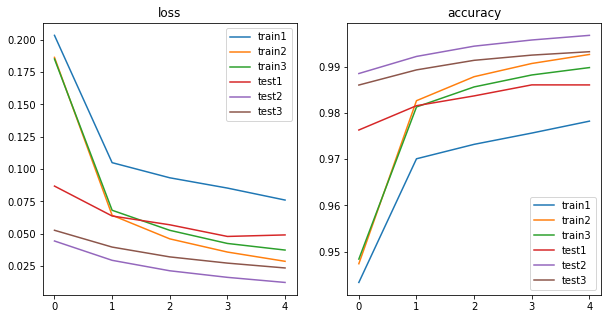

In [19]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    plt.subplot(1, 2, i+1)
    plt.title(metric) 
    plt_train1 = Train1.history[metric] 
    plt_test1 = Test1.history[metric]
    plt_train2 = Train2.history[metric]
    plt_test2 = Test2.history[metric] 
    plt_train3 = Train3.history[metric]
    plt_test3 = Test3.history[metric] 
    plt.plot(plt_train1, label='train1') 
    plt.plot(plt_train2, label='train2') 
    plt.plot(plt_train3, label='train3') 
    plt.plot(plt_test1, label='test1') 
    plt.plot(plt_test2, label='test2') 
    plt.plot(plt_test3, label='test3') 
    plt.legend() 
plt.show()

In [20]:
#Now I came into a conclusion that the second model shows the best performance.
#So I chose the model 2 for this case. 

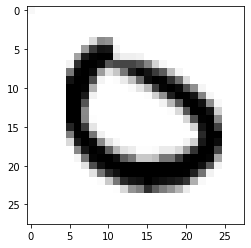

In [21]:
#Here is the prediction sample.
plt.imshow(X_test[[18]].reshape(28,28),cmap='Greys')

In [22]:
#Let's predict.
prediction=model.predict(X_test[[18]]) 
prediction

array([[6.59434692e-13, 3.00851966e-08, 2.43073845e-08, 1.10959656e-04,
        5.59301216e-11, 2.52608667e-17, 1.70336261e-08, 1.95614022e-15,
        3.56391179e-27, 2.95014790e-09, 6.70008991e-15, 5.75456276e-18,
        4.70584875e-14, 1.71911235e-10, 9.99887824e-01, 2.23251195e-08,
        4.40983683e-07, 2.00045004e-13, 4.88184014e-07, 3.56553491e-13,
        6.88838284e-08, 4.94863679e-22, 2.63642217e-13, 3.07505426e-25,
        1.32832656e-09, 2.52223823e-22]], dtype=float32)

In [23]:
#Preparation for this predction. 
alphabets="abcdefghijklmnopqrstuvwxyz"
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in alphabets]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)],". :-)")

The answer is o . :-)
